In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [38]:
# The tech stocks we'll use for this analysis
tech_list = ['INTC','QCOM','MU','TXN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [39]:
# Summary Stats
INTC.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,33.308088,33.651554,33.016653,33.365458,3.154088e+07,32.838890
std,2.373172,2.365750,2.329072,2.326492,1.563015e+07,2.345617
min,26.330000,26.740000,26.180000,26.710000,1.101750e+07,25.985030
25%,31.765000,32.410000,31.485000,31.920000,2.280295e+07,31.488915
50%,33.670000,33.990000,33.260000,33.700000,2.782010e+07,33.218830
75%,34.700000,34.925000,34.440000,34.770000,3.329815e+07,34.100230
max,37.680000,37.900000,37.520000,37.670000,1.358932e+08,37.133210


In [40]:
# General Info
INTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-05-27 to 2015-05-22
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


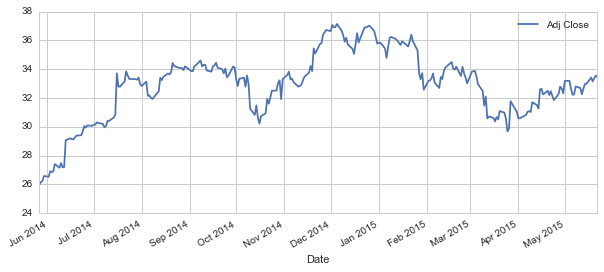

In [41]:
# Let's see a historical view of the closing price
INTC['Adj Close'].plot(legend=True,figsize=(10,4))

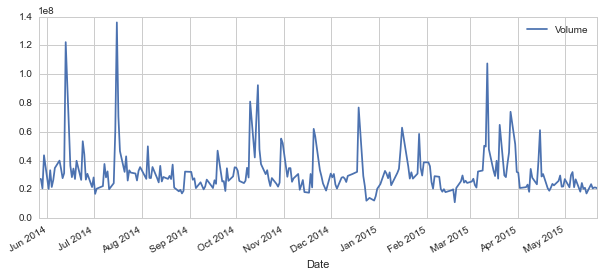

In [42]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
INTC['Volume'].plot(legend=True,figsize=(10,4))

In [44]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    INTC[column_name]=pd.rolling_mean(INTC['Adj Close'],ma)

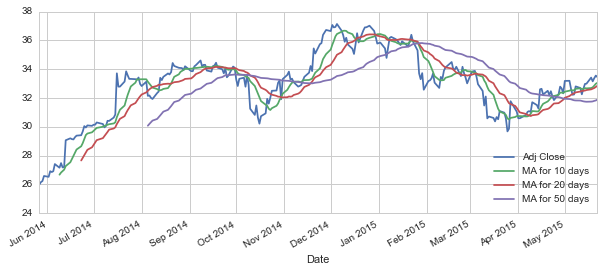

In [45]:
INTC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

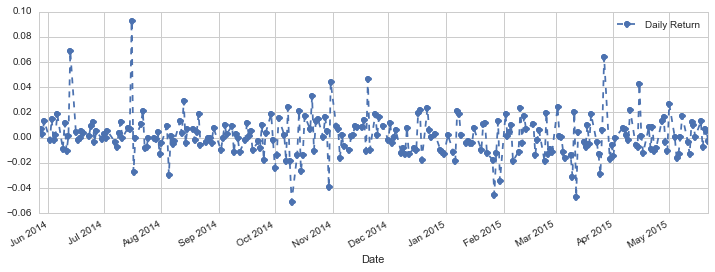

In [46]:
# We'll use pct_change to find the percent change for each day
INTC['Daily Return'] = INTC['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
INTC['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

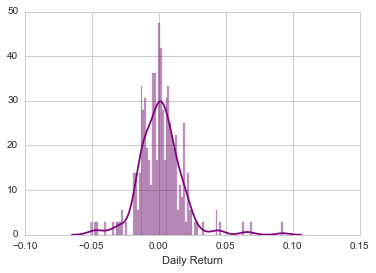

In [47]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(INTC['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#INTC['Daily Return'].hist()

In [48]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['INTC','QCOM','MU','TXN'],'yahoo',start,end)['Adj Close']

In [49]:
# Let's take a quick look
closing_df.head()

,INTC,MU,QCOM,TXN
Date,,,,
2014-05-27,25.98503,28.06,78.67860,45.17174
2014-05-28,26.15041,28.61,78.44392,45.27895
2014-05-29,26.22824,28.58,78.41459,45.47386
2014-05-30,26.57847,28.59,78.66883,45.78573
2014-06-02,26.52010,28.66,79.11118,45.79548


In [50]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [18]:
tech_rets.head()

,INTC,MU,QCOM,TXN
Date,,,,
2014-05-27,NaN,NaN,NaN,NaN
2014-05-28,0.006364,0.019601,-0.002983,0.002373
2014-05-29,0.002976,-0.001049,-0.000374,0.004305
2014-05-30,0.013353,0.000350,0.003242,0.006858
2014-06-02,-0.002196,0.002448,0.005623,0.000213


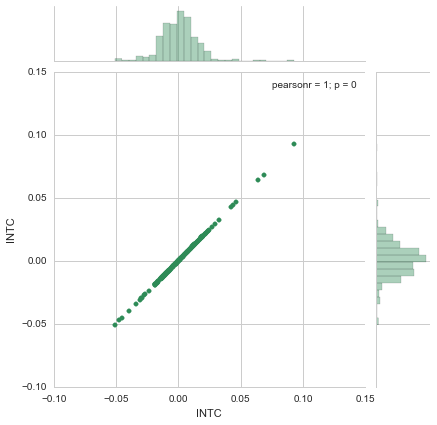

In [51]:
# Comparing Intel to itself should show a perfectly linear relationship
sns.jointplot('INTC','INTC',tech_rets,kind='scatter',color='seagreen')

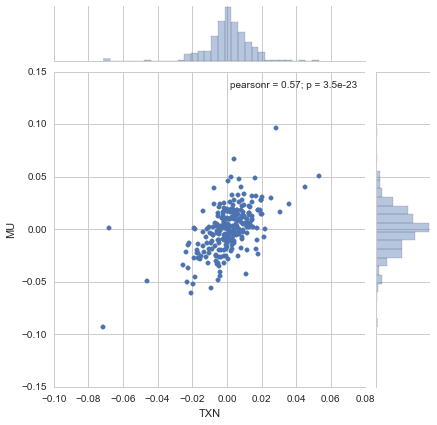

In [67]:
# We'll use joinplot to compare the daily returns of Texas Instruments and Micron Technology
sns.jointplot('TXN','MU',tech_rets,kind='scatter')

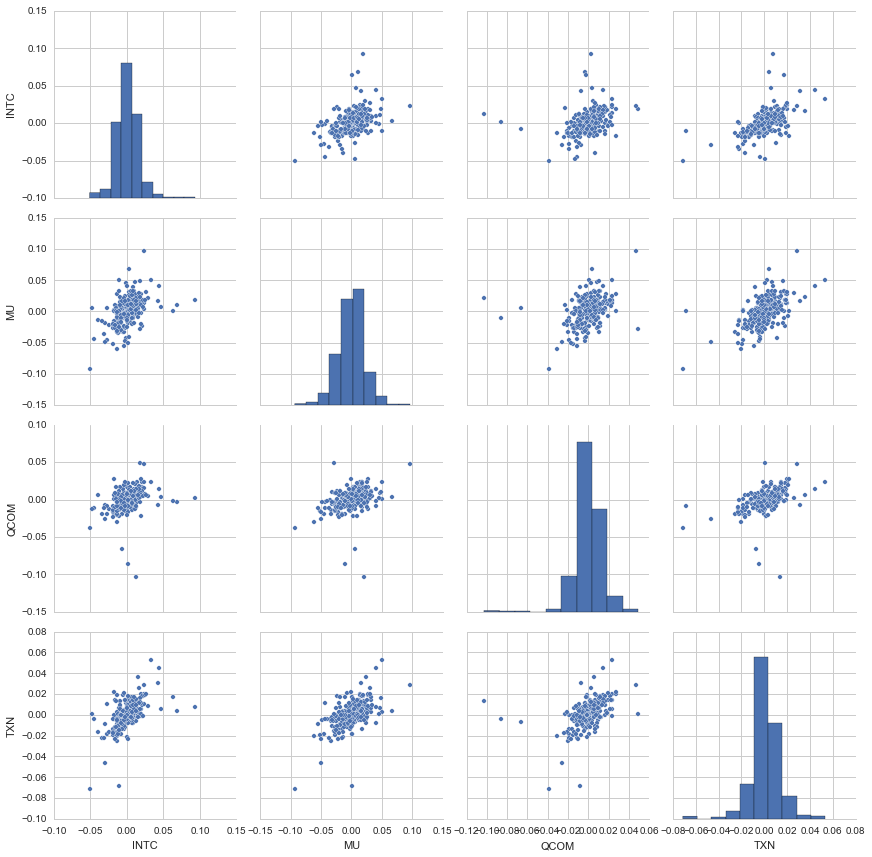

In [54]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

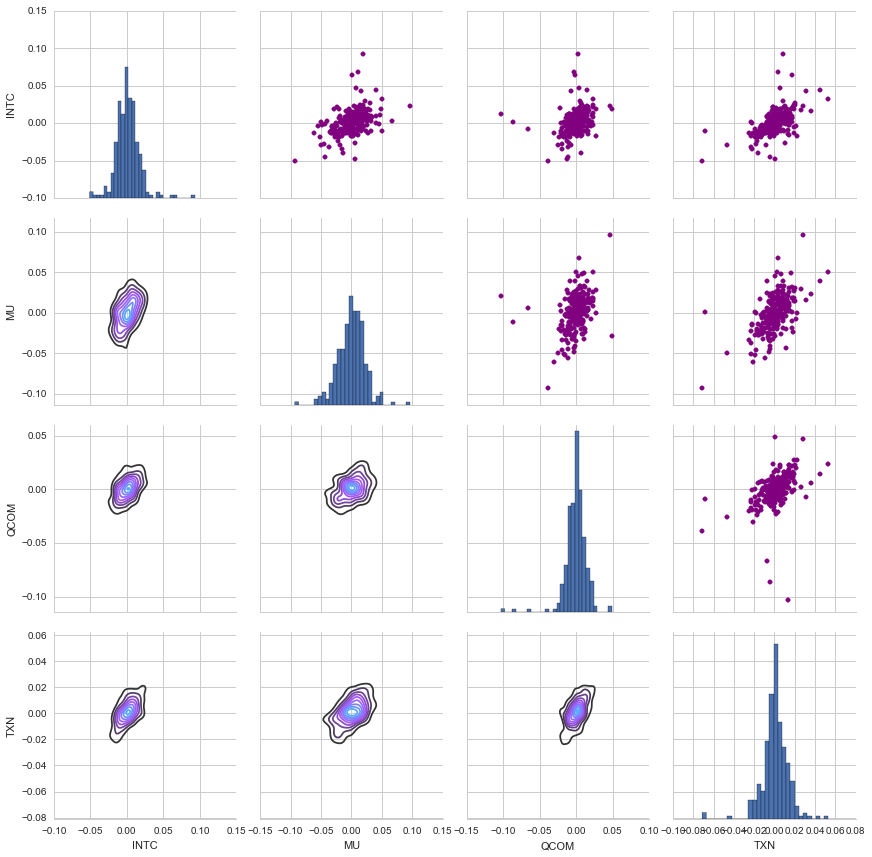

In [55]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

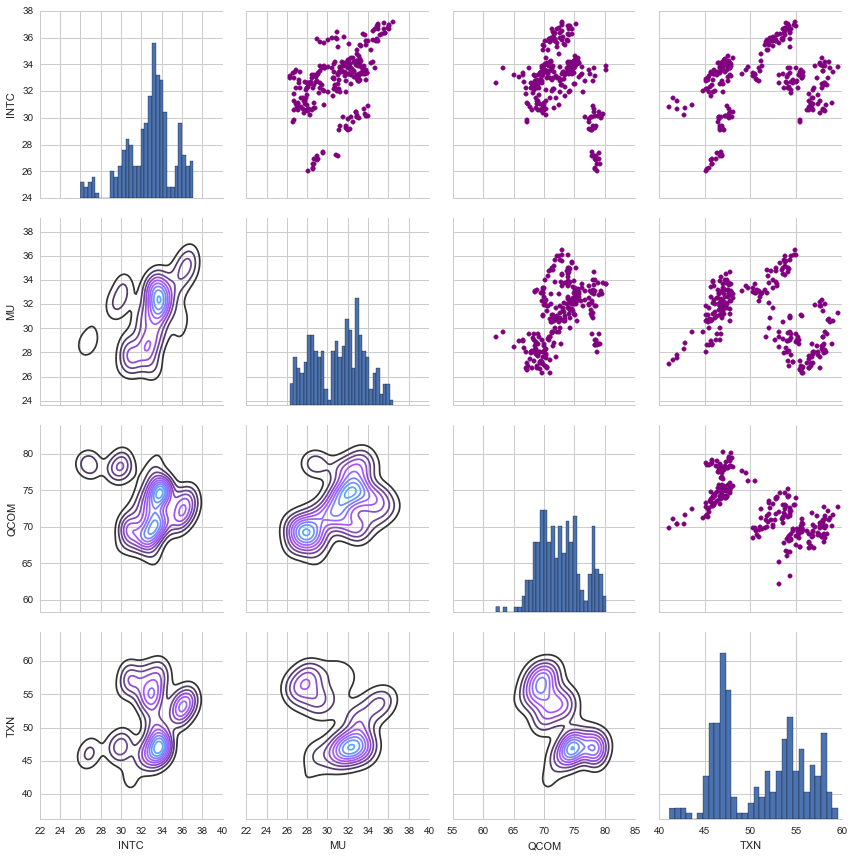

In [56]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

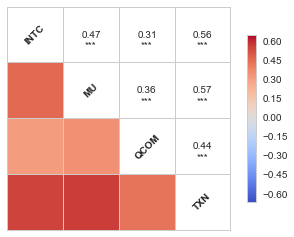

In [57]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

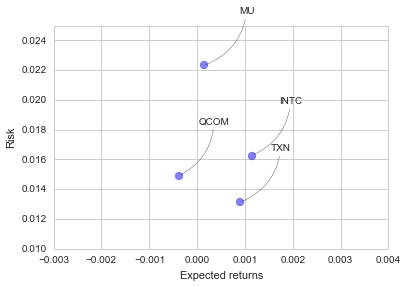

In [30]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [58]:
rets.std()

INTC    0.016265
MU      0.022318
QCOM    0.014913
TXN     0.013123
dtype: float64

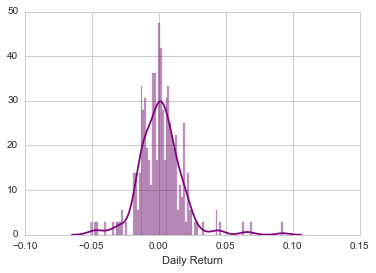

In [59]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(INTC['Daily Return'].dropna(),bins=100,color='purple')

In [60]:
# The 0.05 empirical quantile of daily returns
rets['INTC'].quantile(0.05)

-0.018874859964757667

In [61]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for INTC
mu = rets.mean()['INTC']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['INTC']

In [62]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [63]:
INTC.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-05-27,26.33,26.74,26.18,26.71,27271900,25.98503,NaN,NaN,NaN,NaN
2014-05-28,26.70,26.94,26.66,26.88,27150100,26.15041,NaN,NaN,NaN,0.006364
2014-05-29,26.91,26.96,26.72,26.96,20638900,26.22824,NaN,NaN,NaN,0.002976
2014-05-30,26.94,27.32,26.93,27.32,43641000,26.57847,NaN,NaN,NaN,0.013353
2014-06-02,27.31,27.35,27.12,27.26,20264900,26.52010,NaN,NaN,NaN,-0.002196


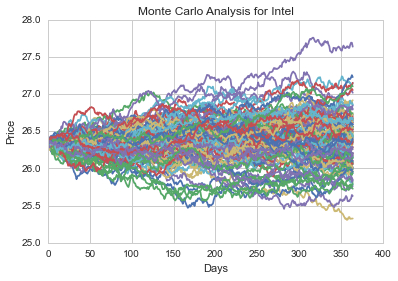

In [66]:
# Get start price from INTC.head()
start_price = 26.33

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Intel')

In [68]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

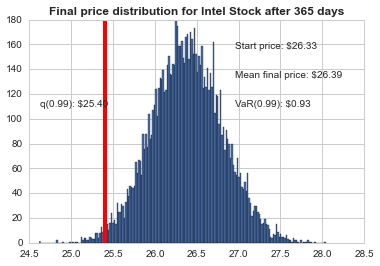

In [69]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Intel Stock after %s days" % days, weight='bold');